<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Модели--без-учета-дисбаланса" data-toc-modified-id="Модели--без-учета-дисбаланса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модели  без учета дисбаланса</a></span></li><li><span><a href="#Модели-с-учетом-балансировки-классов" data-toc-modified-id="Модели-с-учетом-балансировки-классов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модели с учетом балансировки классов</a></span></li><li><span><a href="#Модели-с-учетом-метода-Upsampling" data-toc-modified-id="Модели-с-учетом-метода-Upsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модели с учетом метода Upsampling</a></span></li><li><span><a href="#Модели-с-учетом-метода-Downsampling" data-toc-modified-id="Модели-с-учетом-метода-Downsampling-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модели с учетом метода Downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 


Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [153]:
!pip install scikit-learn==1.1.3

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    f1_score, 
    recall_score, 
    precision_score, 
    auc, 
    roc_curve, 
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix
)
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.preprocessing import (
    StandardScaler, 
    OneHotEncoder
)
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")

In [155]:
data = pd.read_csv('/datasets/Churn.csv')

In [156]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [160]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


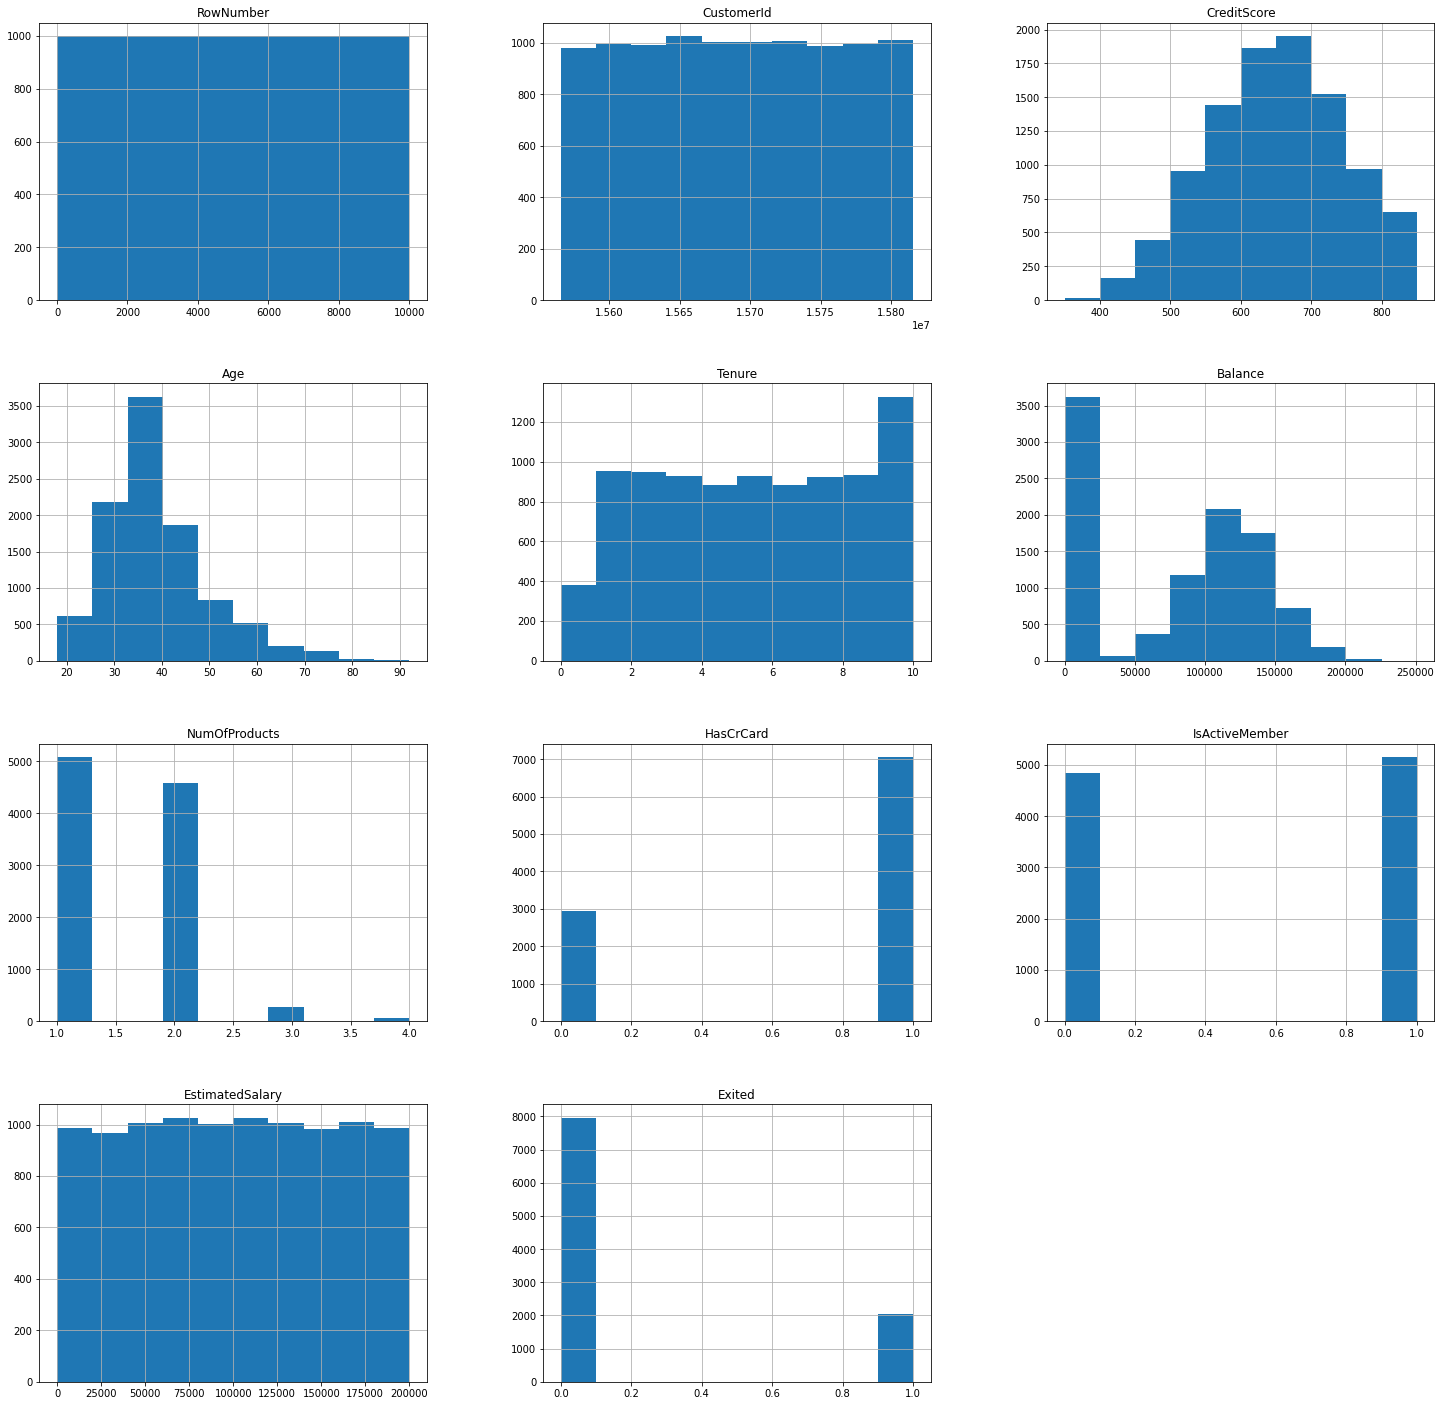

In [161]:
data.hist(figsize=(25, 25));

Исходный датафрейм имеет 10 000 строк и 14 столбцов.

Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента


По графикам явных выбросов не наблюдается. Необходимо названия столбцов привести к стандартному виду, проверить исходный датафрейм на наличие дубликатов, заменить пропущенные значения и приведем к нужному типу данных столбцы, проверить столбец "Предполагаемая зарплата, т.к. мин зарплата равна 11 долл. или евро и удалить лишние, которые не несут ценности для машинного обучения.

In [162]:
# приведем к стандартному виду названия столбцов
data = data.rename(columns={'RowNumber':'row_number', 'CustomerId':'customer_id', 'CreditScore':'credit_score',
       'NumOfProducts':'num_of_products', 'HasCrCard':'has_cr_card',
       'IsActiveMember':'is_active_member', 'EstimatedSalary':'estimated_salary'})

In [163]:
# переведем названия в нижний регистр
data.columns = data.columns.str.lower()

In [164]:
# проверка названия столбцов
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [165]:
# проверим наличие дубликатов
data.duplicated().sum()

0

In [166]:
# проверим наличие дубликатов в столбце "customer_id"
data['customer_id'].duplicated().sum()

0

In [167]:
# рассмотрим подробнее пропущенные значения
data.query('tenure.isna()')

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Пропущенные значения в столбце "Сколько лет человек является клиентом банка, возможно,  связан с тем, что это новые клиенты и поэтому присутствуют пропуски в столбце. Подтвердить это предроложение мы не можем, поэтому заменим медианными значениями, так как будем следовать принципу, что следующие данные будут такими же по распределению, как и текущие.

In [168]:
data['tenure']=data['tenure'].fillna(data['tenure'].median()).astype('int')

Ранее заметили в столбце "Предполагаемый доход" доход 11 долл., что вызывает сомнения. Это выбивающееся значение из всех данных. Рассмотрим Предполагаемый доход менеее 50 долл

In [169]:
data.query('estimated_salary<=50')

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1


Предполагаемый доход 11 долларов, удалим его, как правило, это должно благотворно отразиться на качестве модели при обучении.

In [170]:
data.drop(data.query('estimated_salary<=12').index, inplace=True, axis=0)

Для дальнейшего машинного обучения удалим ненужные столбцы -  row_number, customer_id, surname.

In [171]:
data.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True)

In [172]:
# уникальные значения в столбце "Страна проживания"
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [173]:
# уникальные значения в столбце "Пол"
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [174]:
# информация по датафрейму после обработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9999 non-null   int64  
 1   geography         9999 non-null   object 
 2   gender            9999 non-null   object 
 3   age               9999 non-null   int64  
 4   tenure            9999 non-null   int64  
 5   balance           9999 non-null   float64
 6   num_of_products   9999 non-null   int64  
 7   has_cr_card       9999 non-null   int64  
 8   is_active_member  9999 non-null   int64  
 9   estimated_salary  9999 non-null   float64
 10  exited            9999 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.4+ KB


При подготовке данных исходного датафрейма к дальнейшему обучению наименования столбцов были преведены к стандартному виду, заменены пропущенные значения и приведены в целочисленному вилу столбец "tenure", удалена одна выбивающаяся строка с суммой предполагаемого дохода менее 12 долл. Также для дальнейшего обучения были удалены столбцы, которые не несут ценность для дальнейшего обучения - 'row_number', 'customer_id', 'surname'

## Исследование задачи

Избавляемся от категориальных признаков методом прямого кодирования OHE:

**Используем класс OHE из sklearn для кодирования и масштабирования выборок**

Разделим исходные данные на признаки и целевой признак, а также разделим на обучающую (60%), тестовую (20%) и валидационную (20%) выборки. 

In [183]:
target = data['exited']
features = data.drop('exited', axis=1)

In [184]:
# разбиваем данные на  обучающую и контрольную выборки
features_train, features_control, target_train, target_control = train_test_split(features, target, test_size=.4, random_state=12345)
# разбиваем контрольную выборку на валидационную и тестовую
features_test, features_valid, target_test, target_valid = train_test_split(features_control, target_control, test_size=.5, random_state=12345)

In [185]:
# выделим категориальные признаки для OHE
ohe_features_train = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features_train)

['geography', 'gender']


In [186]:
#численные признаки
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features

['credit_score',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_cr_card',
 'is_active_member',
 'estimated_salary']

In [187]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[ohe_features_train])
# добавляем закодированные признаки
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features_train])
# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(ohe_features_train, axis=1)

In [188]:
# создаём скелер
scaler = StandardScaler()
# обучаем его на численных признаках тренировочной выборки, трансформируем её же
features_train[num_features] = scaler.fit_transform(features_train[num_features])

In [189]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
3412,-0.722654,-1.233545,0.362417,0.610087,-0.912539,0.640211,0.961886,-1.478599,1.0,0.0,1.0
6027,2.054653,0.481765,-0.727741,1.025636,0.813832,-1.561984,0.961886,1.509491,1.0,0.0,1.0
1247,-1.448070,-1.424135,0.362417,-1.223127,0.813832,0.640211,-1.039624,-1.069565,0.0,0.0,1.0
3717,-0.059416,0.005290,-1.817900,1.250622,-0.912539,0.640211,-1.039624,1.253263,1.0,0.0,1.0
8661,1.256696,-0.280595,-0.364355,0.472471,-0.912539,-1.561984,0.961886,-1.646674,1.0,0.0,0.0


In [190]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[ohe_features_train])

features_test = features_test.drop(ohe_features_train, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
features_test[num_features] = scaler.transform(
    features_test[num_features]
)

# смотрим на результат
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8416,-1.282261,-0.661775,-1.091127,0.364092,-0.912539,-1.561984,0.961886,0.205736,1.0,0.0,1.0
2583,0.624547,-0.757070,0.725803,-1.223127,0.813832,0.640211,-1.039624,1.232689,0.0,0.0,0.0
8249,-0.681202,-0.090005,0.362417,-1.223127,0.813832,0.640211,0.961886,-1.064680,0.0,0.0,0.0
1774,-2.204575,-1.042955,0.725803,0.554441,0.813832,0.640211,-1.039624,0.680782,0.0,0.0,1.0
7863,0.976892,0.767650,1.089189,1.057485,-0.912539,0.640211,0.961886,-0.645614,0.0,0.0,1.0


In [191]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем валидационную
features_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_valid[ohe_features_train])

features_valid = features_valid.drop(ohe_features_train, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем валидационную
features_valid[num_features] = scaler.transform(
    features_valid[num_features]
)

# смотрим на результат
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
643,0.085667,0.005290,-0.000969,0.941405,-0.912539,0.640211,-1.039624,1.290812,1.0,0.0,0.0
2899,-0.681202,-0.375890,0.725803,-1.223127,0.813832,0.640211,-1.039624,-0.495101,0.0,0.0,0.0
3018,-0.660475,-1.138250,1.089189,-1.223127,-0.912539,0.640211,-1.039624,-1.374751,0.0,0.0,0.0
8970,1.101249,2.101779,-1.091127,-1.223127,0.813832,0.640211,0.961886,-0.959759,0.0,1.0,1.0
8616,0.013125,-1.138250,0.362417,0.502791,0.813832,0.640211,0.961886,-1.143569,0.0,1.0,0.0


In [192]:
# проверяем наши выборки
features_train.shape, features_valid.shape, features_test.shape

((5999, 11), (2000, 11), (2000, 11))

## Борьба с дисбалансом

Перед тем, как бороться с дисбалансом, проверим качество модели без дополнительных манипуляций

### Модели  без учета дисбаланса

*Модель Логистической регрессии без учета дисбаланса:*

In [193]:
model_lr = LogisticRegression(random_state=12345)
model_lr.fit(features_train, target_train)
predicted_lr = model_lr.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_lr))
print('Полнота:', recall_score(target_valid, predicted_lr))
print('Точность:', precision_score(target_valid, predicted_lr))

F1: 0.2698706099815157
Полнота: 0.18863049095607234
Точность: 0.474025974025974


In [194]:
probabilities_lr = model_lr.predict_proba(features_valid)
probabilities_one_lr = probabilities_lr[:, 1]

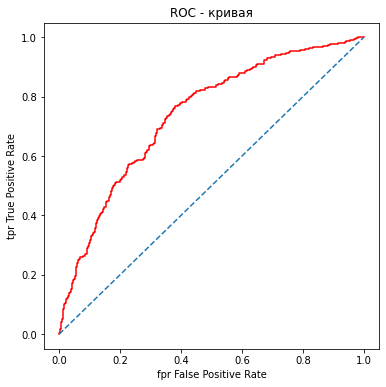

In [195]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_lr)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [196]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_lr))

AUC-ROC модели: 0.738314822557675


*Модель дерева решений без учета дисбаланса:*

In [280]:
best_model_dt = None
best_result_dt = 0
best_depth_dt=0
for depth in range(1, 30):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predicted_dt = model_dt.predict(features_valid)
    result_dt = f1_score(target_valid, predicted_dt)
    
    if best_result_dt < result_dt:
        best_result_dt = result_dt
        best_depth_dt = depth
        best_model_dt = model_dt

print("Лучшая F-мера", best_result_dt, 'cо значением глубины =', best_depth_dt)
print('Полнота:', recall_score(target_valid, predicted_dt))
print('Точность:', precision_score(target_valid, predicted_dt))

Лучшая F-мера 0.5548780487804879 cо значением глубины = 8
Полнота: 0.5167958656330749
Точность: 0.46296296296296297


In [198]:
probabilities_dt = model_dt.predict_proba(features_valid)
probabilities_one_dt = probabilities_dt[:, 1]

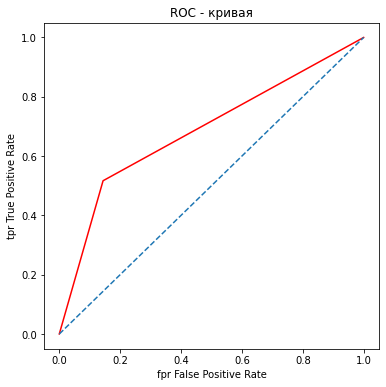

In [199]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_dt)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [200]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_dt))

AUC-ROC модели: 0.6864822477576411


*Модель случайного леса без учета дисбаланса:*

In [201]:
%%time

best_model_rf = None
best_result_rf = 0
best_depth = 0
best_est = 0

for estimator in range(1, 50, 10):
    for depth in range(1, 30):
        model_rf =  RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth = depth)
        model_rf.fit(features_train, target_train)
        predicted_valid_rf = model_rf.predict(features_valid)
        result_rf = f1_score(target_valid, predicted_valid_rf) 
        
        if result_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result_rf
            best_depth = depth
            best_est = estimator

print("Лучшая F-мера", best_result_rf, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))
print('Полнота:', recall_score(target_valid, predicted_valid_rf))
print('Точность:', precision_score(target_valid, predicted_valid_rf))

Лучшая F-мера 0.5913312693498453 при глубине = 21 и количестве деревьев = 21
Полнота: 0.46770025839793283
Точность: 0.7510373443983402
CPU times: user 17.5 s, sys: 58.8 ms, total: 17.5 s
Wall time: 17.7 s


In [202]:
probabilities_rf = model_rf.predict_proba(features_valid)
probabilities_one_rf = probabilities_rf[:, 1]

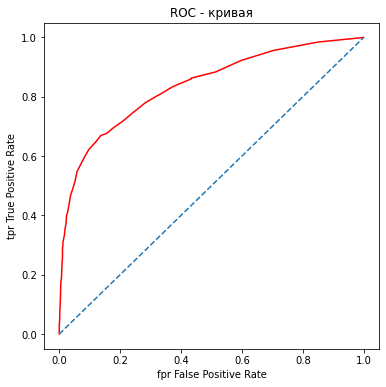

In [203]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_rf)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [204]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_rf))

AUC-ROC модели: 0.83643234635896


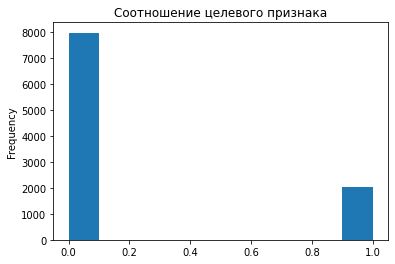

In [205]:
# рассмотрим распределение целевого признака
target.plot(kind='hist', )
plt.title('Соотношение целевого признака')
plt.show()

В наших данных присутсвует дисбаланс целевого признака 1:4, исправим это при помощи балансировки, метода Upsampling и метода Downsampling и выберем лучшую модель.

### Модели с учетом балансировки классов

Придадим целевому признаку оттока клиентов (1) больший вес методом Балансироки при помощи class_weight='balanced'

In [206]:
# Логистическая регрессия с учетом балансировки классов
model_lrb = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lrb.fit(features_train, target_train)
predicted_lrb = model_lrb.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_lrb))
print('Полнота:', recall_score(target_valid, predicted_lrb))
print('Точность:', precision_score(target_valid, predicted_lrb))

F1: 0.450530035335689
Полнота: 0.6589147286821705
Точность: 0.3422818791946309


In [207]:
probabilities_lrb = model_lrb.predict_proba(features_valid)
probabilities_one_lrb = probabilities_lrb[:, 1]

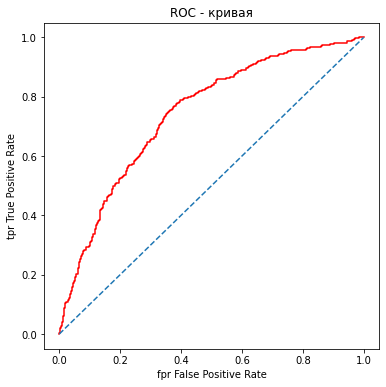

In [208]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_lrb)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [209]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_lrb))

AUC-ROC модели: 0.7416389125179622


In [284]:
# Дерево решений с учетом балансировки классов
best_model_dtb = None
best_result_dtb = 0
best_depth_dtb = 0
for depth in range(1, 50):
    model_dtb = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_dtb.fit(features_train, target_train)
    predicted_dtb = model_dt.predict(features_valid)
    result_dtb = f1_score(target_valid, predicted_dtb)
    if best_result_dtb < result_dtb:
        best_result_dtb = result_dtb
        best_depth_dtb = depth
        best_model_dtb = model_dtb

print("Лучшая F-мера", best_result_dtb, 'cо значением глубины =', best_depth_dtb)
print('Полнота:', recall_score(target_valid, predicted_dtb))
print('Точность:', precision_score(target_valid, predicted_dtb))

Лучшая F-мера 0.48840048840048833 cо значением глубины = 1
Полнота: 0.5167958656330749
Точность: 0.46296296296296297


In [211]:
probabilities_dtb = model_dtb.predict_proba(features_valid)
probabilities_one_dtb = probabilities_dtb[:, 1]

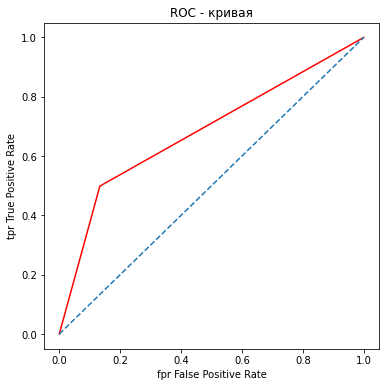

In [212]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_dtb)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [213]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_dtb))

AUC-ROC модели: 0.6827080039280331


In [262]:
%%time
# случайный лес с учетом балансировки классов
rfb_data = pd.DataFrame(columns=['depth', 'n_est', 'f1']) # новая таблица для гиперпараметров
best_model_rfb = None
best_result_rfb = 0
best_depth = 0
best_est = 0

for estimator in range(1, 100, 10):
    for depth in range(1, 20):
        model_rfb =  RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth = depth, class_weight='balanced')
        model_rfb.fit(features_train, target_train)
        predicted_rfb = model_rfb.predict(features_valid)
        result_rfb = f1_score(target_valid, predicted_rfb) 
        new_row = pd.Series(data={'depth': depth, 'n_est': estimator, 'f1': result_rfb}) # строки
        rfb_data = rfb_data.append(new_row,ignore_index=True)
        if result_rfb > best_result_rfb:
            best_model_rfb = model_rfb
            best_result_rfb = result_rfb
            best_depth = depth
            best_est = estimator

print("Лучшая F-мера", best_result_rfb, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))
print('Полнота:', recall_score(target_valid, predicted_rfb))
print('Точность:', precision_score(target_valid, predicted_rfb))

Лучшая F-мера 0.625 при глубине = 9 и количестве деревьев = 61
Полнота: 0.43669250645994834
Точность: 0.7412280701754386
CPU times: user 43 s, sys: 116 ms, total: 43.1 s
Wall time: 43.1 s


In [269]:
pd.set_option('display.max_rows', None)

In [270]:
# посмотрим как изменялся параметр F1 при изменении гиперпараметров
rfb_data

,depth,n_est,f1
0,1.0,1.0,0.293737
1,2.0,1.0,0.369588
2,3.0,1.0,0.450109
3,4.0,1.0,0.551648
4,5.0,1.0,0.538373
5,6.0,1.0,0.514184
6,7.0,1.0,0.511542
7,8.0,1.0,0.521087
8,9.0,1.0,0.532632
9,10.0,1.0,0.541275


In [215]:
probabilities_rfb = model_rfb.predict_proba(features_valid)
probabilities_one_rfb = probabilities_rfb[:, 1]

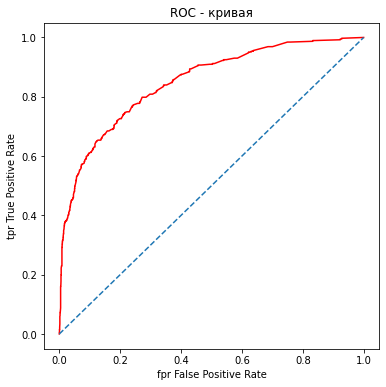

In [216]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_rfb)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [217]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_rfb))

AUC-ROC модели: 0.8488828654776838


### Модели с учетом метода Upsampling

Чтобы избавиться от дисбаланса воспользуемся функцией Upsampling и увеличим количество клиентов оттока(target==1)

In [218]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


In [219]:
# применим функцию upsample
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

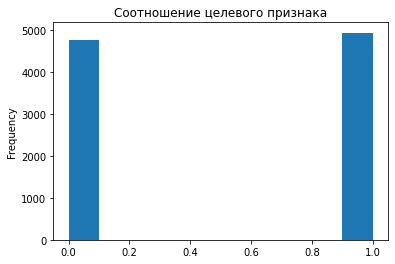

In [220]:
# проверим количество значений
target_upsampled.plot(kind='hist', )
plt.title('Соотношение целевого признака')
plt.show()

Cоотношение значений каждого класса практически одинаково.

In [221]:
# логистическая регрессия метод upsample
model_lr_up = LogisticRegression(solver='liblinear', random_state=12345)
model_lr_up.fit(features_upsampled, target_upsampled)
predicted_lr_up=model_lr_up.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_lr_up))
print('Полнота:', recall_score(target_valid, predicted_lr_up))
print('Точность:', precision_score(target_valid, predicted_lr_up))

F1: 0.4465682015638575
Полнота: 0.6640826873385013
Точность: 0.33638743455497383


In [222]:
probabilities_lr_up = model_lr_up.predict_proba(features_valid)
probabilities_one_lr_up = probabilities_lr_up[:, 1]

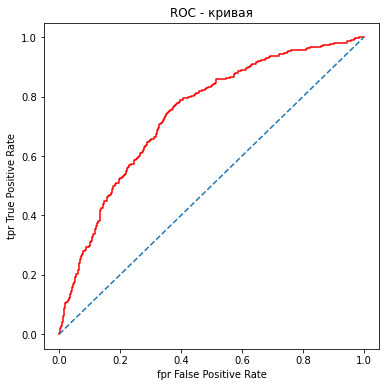

In [223]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_lr_up)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [224]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_lr_up))

AUC-ROC модели: 0.7416693499682009


In [278]:
# дерево решений метод upsample
best_model_dt_up = None
best_result_dt_up = 0
best_depth_dt = 0
for depth in range(1, 50):
    model_dt_up = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt_up.fit(features_upsampled, target_upsampled)
    predicted_dt_up = model_dt_up.predict(features_valid)
    result_dt_up = f1_score(target_valid, predicted_dt_up)
    print(depth, result_dt_up)
    if result_dt_up > best_result_dt_up:
        best_result_dt_up = result_dt_up
        best_depth_dt = depth
        best_model_dt_up = model_dt_up

print("Лучшая F-мера", best_result_dt_up, 'cо значением глубины =', best_depth_dt)
print('Полнота:', recall_score(target_valid, predicted_dt_up))
print('Точность:', precision_score(target_valid, predicted_dt_up))

1 0.4682926829268293
2 0.5103578154425612
3 0.5103578154425612
4 0.5464684014869888
5 0.5335628227194492
6 0.5690021231422505
7 0.5662188099808061
8 0.5524752475247524
9 0.5443425076452599
10 0.5193482688391039
11 0.5115303983228512
12 0.5125408942202836
13 0.47926267281105994
14 0.4847775175644028
15 0.4804878048780488
16 0.4717691342534504
17 0.47295597484276725
18 0.4752223634053367
19 0.48538754764930114
20 0.47959183673469385
21 0.4846153846153846
22 0.47741935483870973
23 0.47741935483870973
24 0.47741935483870973
25 0.47741935483870973
26 0.47741935483870973
27 0.47741935483870973
28 0.47741935483870973
29 0.47741935483870973
30 0.47741935483870973
31 0.47741935483870973
32 0.47741935483870973
33 0.47741935483870973
34 0.47741935483870973
35 0.47741935483870973
36 0.47741935483870973
37 0.47741935483870973
38 0.47741935483870973
39 0.47741935483870973
40 0.47741935483870973
41 0.47741935483870973
42 0.47741935483870973
43 0.47741935483870973
44 0.47741935483870973
45 0.477419354

In [228]:
probabilities_dt_up = model_dt_up.predict_proba(features_valid)
probabilities_one_dt_up = probabilities_dt_up[:, 1]

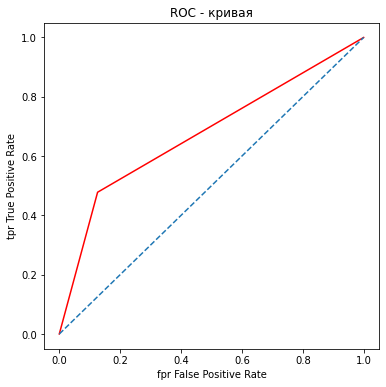

In [229]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_dt_up)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [230]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_dt_up))

AUC-ROC модели: 0.6760918634287628


In [231]:
%%time
# случайный лес метод upsample
best_model_rf_up = None
best_result_rf_up = 0
best_depth = 0
best_est = 0

for estimator in range(1, 70, 5):
    for depth in range(1, 20):
        model_rf_up =  RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth = depth)
        model_rf_up.fit(features_upsampled, target_upsampled)
        predicted_rf_up = model_rf_up.predict(features_valid)
        result_rf_up = f1_score(target_valid, predicted_rf_up) 
        if result_rf_up > best_result_rf_up:
            best_model_rf_up = model_rf_up
            best_result_rf_up = result_rf_up
            best_depth = depth
            best_est = estimator

print("Лучшая F-мера", best_result_rf_up, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))
print('Полнота:', recall_score(target_valid, predicted_rf_up))
print('Точность:', precision_score(target_valid, predicted_rf_up))

Лучшая F-мера 0.6103896103896105 при глубине = 14 и количестве деревьев = 61
Полнота: 0.5297157622739018
Точность: 0.6269113149847095
CPU times: user 1min 3s, sys: 244 ms, total: 1min 4s
Wall time: 1min 4s


In [232]:
probabilities_rf_up = model_rf_up.predict_proba(features_valid)
probabilities_one_rf_up = probabilities_rf_up[:, 1]

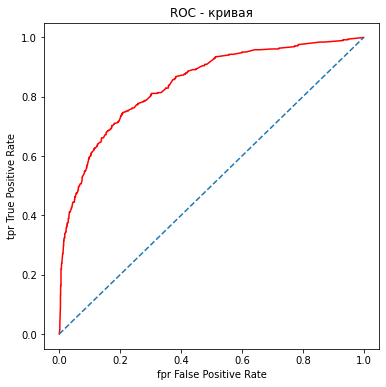

In [233]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_rf_up)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [234]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_rf_up))

AUC-ROC модели: 0.8435082525539424


### Модели с учетом метода Downsampling

Воспользуемся функцией Downsampling и уменьшим количество клиентов (target==0)

In [235]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [236]:
# логистическая регрессия методом Downsampling
model_lg_d = LogisticRegression(random_state=12345, solver='liblinear')
model_lg_d.fit(features_downsampled, target_downsampled)
predicted_lg_d = model_lg_d.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_lg_d))
print('Полнота:', recall_score(target_valid, predicted_lg_d))
print('Точность:', precision_score(target_valid, predicted_lg_d))

F1: 0.456352636127917
Полнота: 0.6821705426356589
Точность: 0.34285714285714286


In [237]:
probabilities_lg_d = model_lg_d.predict_proba(features_valid)
probabilities_one_lg_d = probabilities_lg_d[:, 1]

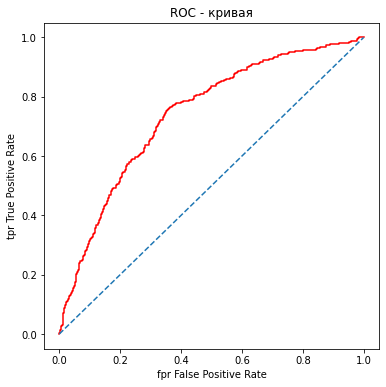

In [238]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_lg_d)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [239]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_lg_d))

AUC-ROC модели: 0.7395211067697696


In [281]:
# дерево решений методом Downsampling
best_model_dt_d = None
best_result_dt_d = 0
best_depth_dt_d = 0
for depth in range(1, 30):
    model_dt_d = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt_d.fit(features_downsampled, target_downsampled)
    predicted_dt_d = model_dt_d.predict(features_valid)
    result_dt_d = f1_score(target_valid, predicted_dt_d)
    
    if best_result_dt_d < result_dt_d:
        best_result_dt_d = result_dt_d
        best_depth_dt_d = depth
        best_model_dt_d = model_dt_d

print("Лучшая F-мера", best_result_dt_up, 'cо значением глубины =', best_depth_dt_d)
print('Полнота:', recall_score(target_valid, predicted_dt_d))
print('Точность:', precision_score(target_valid, predicted_dt_d))

Лучшая F-мера 0.5690021231422505 cо значением глубины = 8
Полнота: 0.7157622739018088
Точность: 0.35421994884910485


In [241]:
probabilities_dt_d = model_dt_d.predict_proba(features_valid)
probabilities_one_dt_d = probabilities_dt_d[:, 1]

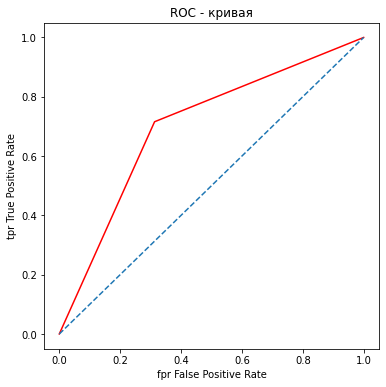

In [242]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_dt_d)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [243]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_dt_d))

AUC-ROC модели: 0.7013405293873582


In [244]:
%%time
# случайный лес
best_model_rf_d = None
best_result_rf_d = 0
best_depth = 0
best_est = 0

for estimator in range(1, 100, 10):
    for depth in range(1, 20):
        model_rf_d =  RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth = depth)
        model_rf_d.fit(features_downsampled, target_downsampled)
        predicted_rf_d = model_rf_d.predict(features_valid)
        result_rf_d = f1_score(target_valid, predicted_rf_d) 
        
        if result_rf_d > best_result_rf_d:
            best_model_rf_d = model_rf_d
            best_result_rf_d = result_rf_d
            best_depth = depth
            best_est = estimator

print("Лучшая F-мера", best_result_rf_d, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))
print('Полнота:', recall_score(target_valid, predicted_rf_d))
print('Точность:', precision_score(target_valid, predicted_rf_d))

Лучшая F-мера 0.5866935483870968 при глубине = 8 и количестве деревьев = 21
Полнота: 0.7596899224806202
Точность: 0.45440494590417313
CPU times: user 26.5 s, sys: 124 ms, total: 26.6 s
Wall time: 26.8 s


In [245]:
probabilities_rf_d = model_rf_d.predict_proba(features_valid)
probabilities_one_rf_d = probabilities_rf_d[:, 1]

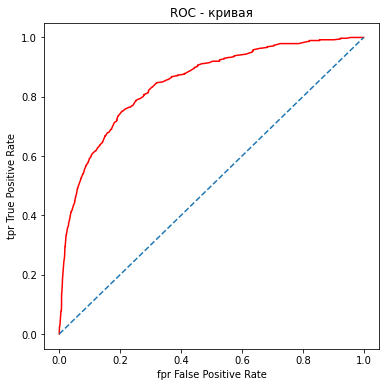

In [246]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_rf_d)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [247]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC модели:', roc_auc_score(target_valid, probabilities_one_rf_d))

AUC-ROC модели: 0.8469188489517503


Вывод:

Таким образом, наилучшей моделью, является модель случайного леса с балансировкой классов: 

Лучшая F-мера 0.625 при глубине = 9 и количестве деревьев = 61

Полнота: 0.4367

Точность: 0.7412

AUC-ROC модели: 0.8488



## Тестирование модели

Проверим нашу наилучшую модель на тестовой выборки.

In [248]:
%%time
model_test =  RandomForestClassifier(random_state=12345, n_estimators=91, max_depth = 10, class_weight='balanced')
model_test.fit(features_train, target_train)
predicted_test = model_test.predict(features_test)
result_test = f1_score(target_test, predicted_test)
print('F1:', result_test)
print('Полнота:', recall_score(target_test, predicted_test))
print('Точность:', precision_score(target_test, predicted_test))

F1: 0.6131025957972807
Полнота: 0.5975903614457831
Точность: 0.6294416243654822
CPU times: user 480 ms, sys: 3.94 ms, total: 484 ms
Wall time: 495 ms


На тестовой выборке модель ведет себя чуть хуже, но все равно более 0,6. Построим ROC-кривую и посчитаем AUC-ROC для нашей модели и посмотрим насколько она лучше случайной модели

In [249]:
probabilities_test = model_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

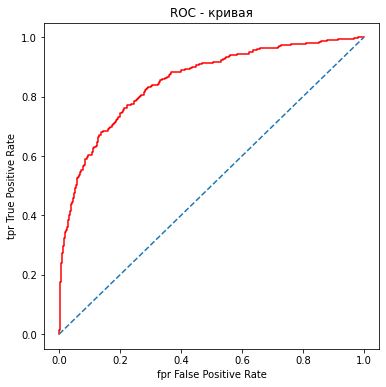

In [250]:
# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [251]:
# посчитаем AUC-ROC, чтобы выявить как сильно модель отличается от случайной

print('AUC-ROC наилучшей модели:', roc_auc_score(target_test, probabilities_one_test))

AUC-ROC наилучшей модели: 0.8518840028885257


In [252]:
target_predict_constant = pd.Series([0]*len(target_test))
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))

AUC-ROC константой модели: 0.5


Таким образом наша наилучшая модель показывает результаты лучше, чем константная модель. Нашу модель можно считать адекватной для дальнейшего прогноза.

## Вывод

 Проведено прогнозирование оттока клиентов банка на основе исторических данных поведения клиентов.

Было проведено:
- Подготовка данных: в исходных данных наименования столбцов были приведены к стандартному виду, заменены пропущенные значения и приведены в целочисленному вилу столбец "tenure", данные проверены на дубликаты, удалена одна выбивающаяся строка с суммой предполагаемого дохода менее 12 долл. Также для дальнейшего обучения были удалены столбцы, которые не несут ценность для дальнейшего обучения - 'row_number', 'customer_id', 'surname'.
- Исследование данных: категориальные признаки в столбцах "Страна нахождения" и "Пол" были переведены в дамми-переменные. Выборка была поделена на обучающую, тестовую и валидационную выборки. Так как в наших данных есть и маленькие значения и большие стандартизировали обучающую, тестовую и валидационную выборки.
- Борьба с дисбалансом: использована техника балансировки классов, upsampling и downsampling, проанализированы модели LogisticRegression, DecisionTreeClassifier, RandomForestClassifier. Самый высокий результат показала модель случайного леса с балансировкой классов: F1 на валидационной выборке=0.625 при глубине = 9 и количестве деревьев = 61. F1 на тестовой выборке=0.6131.
- Тестирование модели: проведена проверка модели на адекватность, путём сравнения со случайной моделью. Показеть AUC-ROC наилучшей модели: 0.851. Это значит, что наилучшая модель на 85% отличается от случайной.


Таким образом модель случайного леса при глубине = 9 и количестве деревьев = 61 рекомендуется использовать при прогнозе оттока клиентов.
